Predicting finally

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 1</span>
    <h1 style="font-size: 30px;">Dataset Preperation </h1>
</div>

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, precision_recall_curve
import matplotlib.pyplot as plt
from plotnine import *
import pyarrow.feather as feather

In [32]:
# Load the Feather file into a DataFrame
car_df = feather.read_feather('processed_data.feather')

In [33]:
car_df.columns

Index(['year', 'brand', 'model', 'trim', 'body', 'transmission', 'condition',
       'odometer', 'color', 'interior', 'sellingprice', 'brand_model',
       'car_age', 'mileage_per_year', 'market_price_deviation', 'brand_label',
       'trim_label', 'body_label', 'color_label', 'interior_label',
       'transmission_label'],
      dtype='object')

In [34]:
car_df.head()

,year,brand,model,trim,body,transmission,condition,odometer,color,interior,...,brand_model,car_age,mileage_per_year,market_price_deviation,brand_label,trim_label,body_label,color_label,interior_label,transmission_label
2,2014,Bmw,3 Series,Others,Sedan,Automatic,1.145277,-1.364964,Silver,Black,...,Bmw_3 Series,-1.021999,-2.023111,-1.773132,8,0,1,1,1,0
3,2015,Others,Others,Others,Sedan,Automatic,0.719401,-1.086219,White,Black,...,Volvo_S60,-1.311799,-0.107857,0.287817,0,0,1,3,1,0
4,2014,Bmw,Others,Others,Sedan,Automatic,0.932339,-1.336769,Silver,Black,...,Bmw_6 Series Gran Coupe,-1.311799,-0.107857,1.006753,8,0,1,1,1,0
6,2014,Bmw,Others,Base,Sedan,Automatic,-0.025882,-1.071992,Black,Black,...,Bmw_M5,-1.311799,-0.107857,0.000243,8,1,1,2,1,0
7,2014,Chevrolet,Others,Others,Sedan,Automatic,-1.516450,-0.777685,Black,Black,...,Chevrolet_Cruze,-1.311799,-0.107857,-1.964848,2,0,1,2,1,0


> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Train, test, validation split</b></font></div>

In [35]:
X = car_df[['year', 'brand', 'model', 'trim', 'body', 'transmission', 'condition',
       'odometer', 'color', 'interior', 'brand_model',
       'car_age', 'mileage_per_year', 'market_price_deviation', 'brand_label',
       'trim_label', 'body_label', 'color_label', 'interior_label',
       'transmission_label']].copy()
y = car_df[['sellingprice']].copy()

In [36]:
from sklearn.model_selection import train_test_split
#Source https://github.com/bagusganjarl/used-car-auction-prices/blob/main/final_stage_source_code.ipynb
car_train, car_test, price_train, price_test = train_test_split(X, y, test_size=0.3, random_state=77) # pembagian data test 30%, train 70%

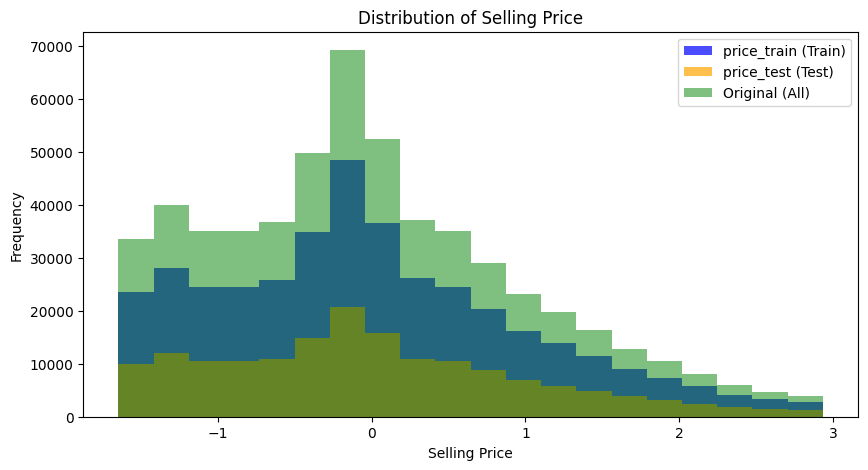

Train Set Summary Statistics:
count    391027.000000
mean         -0.000161
std           0.999736
min          -1.649119
25%          -0.748003
50%          -0.068803
75%           0.603866
max           2.935351
Name: sellingprice, dtype: float64

Test Set Summary Statistics:
count    167583.000000
mean          0.000377
std           1.000623
min          -1.649119
25%          -0.748003
50%          -0.068803
75%           0.610397
max           2.935351
Name: sellingprice, dtype: float64

Train Set Selling Price Proportions:
-0.068803    0.033507
-0.081865    0.008012
-0.212480    0.007979
 0.048751    0.007792
-0.343096    0.007342
Name: sellingprice, dtype: float64

Test Set Selling Price Proportions:
-0.068803    0.033703
-0.212480    0.007942
-0.081865    0.007841
 0.048751    0.007668
-0.147172    0.007196
Name: sellingprice, dtype: float64


In [40]:
import matplotlib.pyplot as plt

# Check 'sellingprice' distribution
plt.figure(figsize=(10, 5))
plt.hist(y_train, bins=20, alpha=0.7, label='price_train (Train)', color='blue')
plt.hist(y_test, bins=20, alpha=0.7, label='price_test (Test)', color='orange')
plt.hist(car_df['sellingprice'], bins=20, alpha=0.5, label='Original (All)', color='green')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Price')
plt.legend()
plt.show()

# Calculate summary statistics
train_stats = y_train.describe()
test_stats = y_test.describe()

print("Train Set Summary Statistics:")
print(train_stats)
print("\nTest Set Summary Statistics:")
print(test_stats)

# Check proportion of categories in 'sellingprice'
train_proportions = y_train.value_counts(normalize=True)
test_proportions = y_test.value_counts(normalize=True)

print("\nTrain Set Selling Price Proportions:")
print(train_proportions.head())
print("\nTest Set Selling Price Proportions:")
print(test_proportions.head())

In [41]:
car_test.head()

,year,brand,model,trim,body,transmission,condition,odometer,color,interior,brand_model,car_age,mileage_per_year,market_price_deviation,brand_label,trim_label,body_label,color_label,interior_label,transmission_label
277940,2012,Honda,Others,Others,Suv,Automatic,0.612932,-0.500812,Other,Beige,Honda_Pilot,-0.442400,-0.174164,0.144030,6,0,2,0,3,0
101736,2002,Ford,Focus,Se,Sedan,Automatic,-1.622919,1.790127,Black,Black,Ford_Focus,2.455598,-0.536435,-0.550941,1,2,1,2,1,0
56161,2012,Honda,Accord,Se,Sedan,Automatic,0.080587,-1.050641,Silver,Black,Honda_Accord,-0.442400,-1.434119,-0.143544,6,2,1,1,1,0
223272,2012,Nissan,Altima,Others,Coupe,Automatic,0.187056,-0.440849,Other,Black,Nissan_Altima,-0.442400,-0.036756,-0.047686,3,0,5,0,1,0
450393,2013,Others,Others,Others,Sedan,Automatic,0.825870,-0.953873,Black,Black,Cadillac_Ats,-0.732200,-0.708533,-0.335260,0,0,1,2,1,0


In [42]:
car_train.head()

,year,brand,model,trim,body,transmission,condition,odometer,color,interior,brand_model,car_age,mileage_per_year,market_price_deviation,brand_label,trim_label,body_label,color_label,interior_label,transmission_label
336455,2013,Ford,F-150,Others,Other,Automatic,0.399994,-0.337882,Red,Tan,Ford_F-150,-0.732200,1.408819,-1.293841,1,0,0,4,4,0
516278,2015,Dodge,Others,Others,Suv,Automatic,1.677623,-1.095301,Silver,Black,Dodge_Journey,-1.311799,-0.107857,-0.143544,5,0,2,1,1,0
114794,2010,Ford,Altima,Base,Sedan,Automatic,-0.771166,0.555627,Other,Silver,Ford_Altima,0.137200,0.460006,-1.581416,1,1,1,0,2,0
197910,2014,Bmw,Others,Base,Suv,Automatic,1.571154,-1.297748,Black,Black,Bmw_X6 M,-1.021999,-1.561022,1.965334,8,1,2,2,1,0
268345,2011,Hyundai,Others,Others,Coupe,Automatic,0.187056,-0.640626,Silver,Beige,Hyundai_Genesis Coupe,-0.152600,-0.925928,0.719179,7,0,5,1,3,0


<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 1</span>
    <h1 style="font-size: 30px;">Model Fitting </h1>
</div>

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>Random Forest</b></font></div>

> <div style="text-align: center"><font color='gold' style='font-size: 30px;'><b>ANN</b></font></div>

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 1</span>
    <h1 style="font-size: 30px;">Model Evaluation </h1>
</div>

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 1</span>
    <h1 style="font-size: 30px;">Model Selection </h1>
</div>

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 1</span>
    <h1 style="font-size: 30px;">Model Explainability </h1>
</div>

<div style="position: relative; background: #3567A8; color: white; padding: 10px 15px; text-align: center; border-radius: 6px;">
    <span style="position: absolute; left: -25px; top: 10px; transform: rotate(-45deg); background: #3567A8; padding: 5px 10px; border-radius: 3px;">Section 1</span>
    <h1 style="font-size: 30px;">Bonus 1? </h1>
</div>